In [22]:
# Step 1: Load dataset
import pandas as pd
df = pd.read_csv("diabetes.csv")

# Step 2: Feature matrix and label
X = df.drop(columns='Outcome', axis=1)
Y = df['Outcome']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.188093,-2.598075,-1.546738,5.012214,-2.931152,-3.599275,1.636806,-0.530395
1,-1.410538,-3.754932,-1.413862,3.383986,-0.907609,-2.568217,-0.814938,0.360186
2,-1.543991,-2.163572,0.392428,1.502724,1.642945,1.569722,-2.988584,-2.536647
3,-2.826774,-2.433848,-0.985261,0.323552,-1.035475,-1.422035,-0.328273,1.630794
4,-1.455335,-4.198515,1.154567,3.986387,1.074079,1.012788,-3.806394,-3.084259
...,...,...,...,...,...,...,...,...
495,-3.304711,1.653106,0.802366,-4.467550,2.071321,-0.410598,-1.657271,-0.521276
496,-3.050721,2.061946,-3.528852,-3.414110,-0.748969,3.720574,2.378373,0.658707
497,-2.326950,1.244817,-2.697114,0.511028,-0.999666,1.127345,1.822784,-3.003061
498,-1.704565,-1.133554,4.642454,0.742939,0.540381,-3.420329,-2.901381,-2.453981


In [23]:
Y

0      0
1      0
2      1
3      0
4      1
      ..
495    0
496    1
497    0
498    0
499    0
Name: Outcome, Length: 500, dtype: int64

In [24]:
# Step 3: Train-test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)



X_train shape: (400, 8)
X_test shape: (100, 8)
Y_train shape: (400,)
Y_test shape: (100,)


In [25]:
# Step 4: Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [26]:
# Step 5: Training accuracy
from sklearn.metrics import accuracy_score

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy on Training data :", round(training_data_accuracy * 100, 2), "%")


Accuracy on Training data : 90.0 %


In [27]:
# Step 6: Test accuracy
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy on Test data :", round(test_data_accuracy * 100, 2), "%")


Accuracy on Test data : 89.0 %


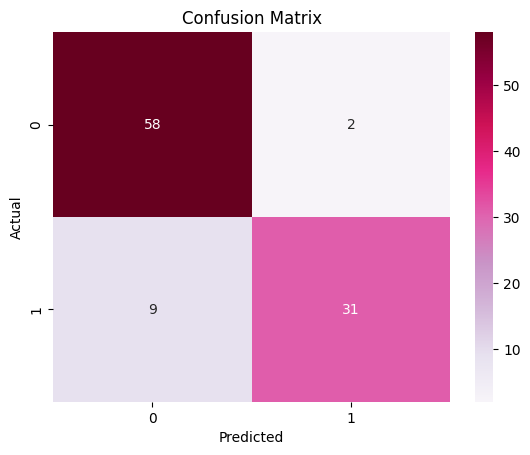

In [29]:
# Step 7: Confusion Matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuRd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [30]:
# Step 8: Precision - Training
from sklearn.metrics import precision_score

precision_train = precision_score(Y_train, X_train_prediction)
print("Training data Precision =", precision_train)


Training data Precision = 0.9115646258503401


In [31]:
# Step 9: Precision - Test
precision_test = precision_score(Y_test, X_test_prediction)
print("Test data Precision =", precision_test)


Test data Precision = 0.9393939393939394


In [32]:
# Step 10: Recall - Training
from sklearn.metrics import recall_score

recall_train = recall_score(Y_train, X_train_prediction)
print("Training data Recall =", recall_train)


Training data Recall = 0.8322981366459627


In [33]:
# Step 11: Recall - Test
recall_test = recall_score(Y_test, X_test_prediction)
print("Test data Recall =", recall_test)


Test data Recall = 0.775


In [34]:
# Step 12: F1 Score - Training
from sklearn.metrics import f1_score

f1_score_train = f1_score(Y_train, X_train_prediction)
print("Training data F1 Score =", f1_score_train)


Training data F1 Score = 0.8701298701298701


In [39]:
# Step 13: F1 Score - Test
f1_score_test = f1_score(Y_test, X_test_prediction)
print("Test data F1 Score =", f1_score_test)


Test data F1 Score = 0.8493150684931506


In [42]:
# Step 14: Generalized Evaluation Function
def precision_recall_f1_score(true_labels, pred_labels):
    precision_value = precision_score(true_labels, pred_labels)
    recall_value = recall_score(true_labels, pred_labels)
    f1_score_value = f1_score(true_labels, pred_labels)
    print('Precision =', precision_value)
    print('Recall =', recall_value)
    print('F1 Score =', f1_score_value)


In [43]:
# Step 15: Evaluate Training Data
precision_recall_f1_score(Y_train, X_train_prediction)


Precision = 0.9115646258503401
Recall = 0.8322981366459627
F1 Score = 0.8701298701298701


In [44]:
# Step 16: Evaluate Test Data
precision_recall_f1_score(Y_test, X_test_prediction)


Precision = 0.9393939393939394
Recall = 0.775
F1 Score = 0.8493150684931506
